W:  [-0.4349782 -0.8014226]
b:  0.6299999999999988
Predicción : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


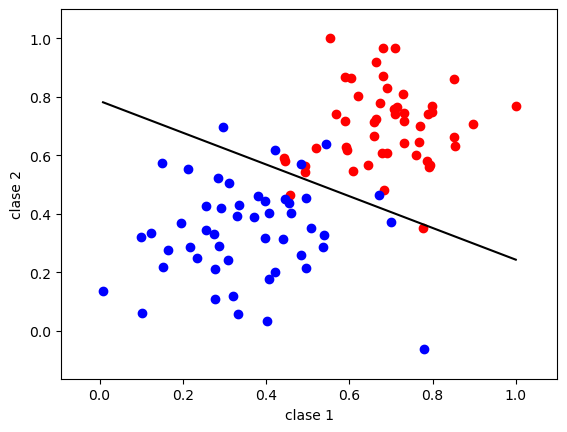

In [2]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as mpl
    %matplotlib inline

    # Leer datos csv
    df = pd.read_csv("data.csv")

    ep = int(input('Digite número de Épocas: '))

    # X1 primera columna; X2 segunda columna; C es la clasificación de referencia:
    X = np.array(df[['X1', 'X2']])
    C = df['C'].to_numpy().reshape(-1, 1)      #c = clasificacion

    # def pesos y bias de prueba:
    W1 = 0.5
    W2 = 0.1
    b =  2
    W = np.array([W1,W2])


    # funcion escalón:
    def escalon(t):
        if t >= 0:
            return 1
        return 0

    # funcion para predicción:
    def prediccion(Xf,Wf,bf):
        # Retorna la multiplicación de X y W mas el bias
        return escalon((np.matmul(Xf,Wf))+bf)

    # define prediccion con escalon
    def prediccion_escalon(X, C, W, b, epf, learn_rate=0.01):
        C_pred = np.zeros(len(X))  
        for k in range(epf):
            for i in range(len(X)):
                Y_pred = prediccion(X[i], W, b)
                C_pred[i] = Y_pred  
                if Y_pred != C[i]:
                    if Y_pred > 0:
                        W[0] -= X[i][0] * learn_rate
                        W[1] -= X[i][1] * learn_rate
                        b -= learn_rate
                    else:
                        W[0] += X[i][0] * learn_rate
                        W[1] += X[i][1] * learn_rate
                        b += learn_rate

        print("W: ", W)
        print("b: ", b)
        print("Predicción :", C_pred)

        return W, b, C_pred


    # Ejecutar la predicción con la función prediccion_escalon
    W, b, C_pred = prediccion_escalon(X, C, W, b, ep)


    # separar los puntos por clase
    X1 = X[C.flatten() == 0]
    X2 = X[C.flatten() == 1]

    # graficar los puntos de cada clase
    mpl.scatter(X1[:, 0], X1[:, 1], color='red')
    mpl.scatter(X2[:, 0], X2[:, 1], color='blue')

    # graficar la línea de división
    x_vals = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_vals = (-b - W[0] * x_vals) / W[1]
    mpl.plot(x_vals, y_vals, color = 'black')
    mpl.xlim([np.min(X[:, 0]) - 0.1, np.max(X[:, 0]) + 0.1])
    mpl.ylim([np.min(X[:, 1]) - 0.1, np.max(X[:, 1]) + 0.1])
    mpl.xlabel('clase 1')
    mpl.ylabel('clase 2')
    mpl.show()


In [3]:
C.shape

(100, 1)

In [16]:
#Funciones sigmoide, entropia cruzada, máxima verosimulitud, y funcion de error


# Definición de la función sigmoide
def sigmoide(x):
    return 1/(1+np.exp(-x))

P = sigmoide(np.matmul(X, W) + b)

# Definición de la función que cálcula la entropia cruzada
def entropia(C, P):
    ent_c = np.zeros((len(C),1))
    for i in range(100):
        ent_c[i] = -1*C[i]*np.log(P[i]) - (1-C[i])*np.log(1 - P[i])
    return np.sum(ent_c),ent_c

# Definición de la función que cálcula la máxima verosimilitud
def max_ver(C,P):
    ent_c = np.zeros((100,1))
    for i in range(100):
        ent_c[i] = (C[i]*P[i] + (1-C[i])*(1 - P[i]))    
    return np.prod(ent_c)

#Funcion de error:
def Error_function (CE):
    return np.mean(CE)

# Calcular la entropía cruzada y la máxima verosimilitud
CE, ent_c = entropia(C, P)
MV = max_ver(C, P)

# Calcular la función de error
error = Error_function(CE)      #Mi funcion de error es mi entropía cruzada

print('El error es:', error)
print('El valor de máxima verosimilitud es:', MV)
print('La entropía cruzada total es:', CE)
for i in range(len(C)):
    print('La entropía cruzada para:', X[i], 'es', ent_c[i])



El error es: 59.34704830387647
El valor de máxima verosimilitud es: 1.6823037165845552e-26
La entropía cruzada total es: 59.34704830387647
La entropía cruzada para: [ 0.78051  -0.063669] es [0.53689597]
La entropía cruzada para: [0.28774 0.29139] es [0.56666401]
La entropía cruzada para: [0.40714 0.17878] es [0.55027072]
La entropía cruzada para: [0.2923 0.4217] es [0.61409419]
La entropía cruzada para: [0.50922 0.35256] es [0.6321534]
La entropía cruzada para: [0.27785 0.10802] es [0.50401809]
La entropía cruzada para: [0.27527 0.33223] es [0.57856775]
La entropía cruzada para: [0.43999 0.31245] es [0.60346379]
La entropía cruzada para: [0.33557 0.42984] es [0.62580408]
La entropía cruzada para: [0.23448 0.24986] es [0.54263463]
La entropía cruzada para: [0.0084492 0.13658  ] es [0.46774258]
La entropía cruzada para: [0.12419 0.33595] es [0.55149163]
La entropía cruzada para: [0.25644 0.42624] es [0.60862393]
La entropía cruzada para: [0.4591  0.40426] es [0.64140026]
La entropía cruz